# Assignment 4: Optimizing Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

In this assignment, you will build logistic regression models using "Cell2Cell", a telecom company churn prediction data set. You will build many variants, each one with a different value of the $C$ hyperparameter, which governs the amount of regularization used. Regularization is a process where we add a "penalty" to the original log loss function. This penalty is a function of the magnitudes of the weights learned in the Logistic Regression. The following shows the regularized log loss using what is called "L2" regularization.<br><br> 

<center>$Regularized \ LogLoss = -\frac{1}{n} \sum\limits_{i=1}^n (y_i*log(p_i)+(1-y_i)*log(1-p_i))+\frac{1}{C} \sum\limits_{j=1}^m W_j^2$</center><br><br>



With L2 regularization, the penalty is the sum of the squares of the weights scaled by a constant $1/C$. When the hyperparameter $C$ is large, we reduce the weight of the penalty, which results in less regularization. You will build Logistic regressions with different values of $C$ and will check how this impacts the log loss.

In this assignment, you will implement the following steps:

1. Load the "cell2celltrain" data set.
2. Create unlabeled examples containing numerical features only.
3. Split the data into training and test data sets.
4. Fit a Logistic Regression classifier using scikit-learn and evaluate the log loss and accuracy of the predictions.
5. Fit multiple Logistic Regression classifiers with different values of the regularization hyperparameter $C$ and plot the resulting log loss and accuracy.

## Part 1. Load the Data Set

We will work with the "cell2celltrain" data set.

In [2]:
# Do not remove or edit the line below:
filename = os.path.join(os.getcwd(), "data", "cell2celltrain.csv")

**Task**: Load the data and save it to DataFrame `df`.

In [3]:
df = pd.read_csv(filename, header =0)

## Part 2: Create Labeled Examples from the Data Set 

To implement a Logistic Regression model, we must use only the numeric columns. 


<b>Task</b>: Use the Pandas DataFrame <code>select_dtypes()</code> method to obtain all of names of columns that have a dtype of "float64." Save the result to a list named `feature_list`. 

In [5]:
feature_list = list(df.select_dtypes(include = ['float64']).columns)

<b>Task</b>: Create labeled examples from DataFrame `df`.

In the code cell below carry out the following steps:

* Get the `Churn` column from DataFrame `df` and assign it to the variable `y`. This will be our label. The label will be either True or False.
* Get the columns listed in `feature_list`from DataFrame `df` and assign them to the variable `X`. These will be our features. 

You should have 51047 labeled examples. Each example contains 35 features and one label (`Churn`).

In [6]:
# YOUR CODE HERE
y = df['Churn']
X = df[feature_list]

print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features:" + str(X.shape[1]))
print(str(list(X.columns)))


Number of examples: 51047

Number of Features:35
['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating', 'HandsetPrice']


## Part 3: Create Training and Test Data Sets

<b>Task</b>: In the code cell below create training and test data sets out of the labeled examples. 

1. Use scikit-learn's `train_test_split()` method to create the data sets.

2. Specify:
    * A test set that is 33 percent (.33) of the size of the data set.
    * A seed value of '1234'. 
    


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 1234)

Check that the dimensions of the training and test data sets are what you expected:

In [8]:
print(X_train.shape)
print(X_test.shape)

(34201, 35)
(16846, 35)


## Part 4. Fit a Logistic Regression Classifier and Evaluate the Model

The code cell below contains a shell of a function named `train_test_LR()`. This function will train a Logistic Regression model on the training data, test the resulting model on the test data, and compute and return (1) the log loss of the resulting probability predictions on the test data and (2) the accuracy score of the resulting predicted class labels on the test data. 

Inspect the function definition `train_test_LR(X_train, X_test, y_train, y_test, c=1)`. The function expects the test and train datasets as well as a value for hyperparameter $C$. Note that we supplied the value of 1 for $C$ by default.

You will use the scikit-learn ```LogisticRegression``` class. Use `LogisticRegression()` to create a model object, and assign the result to the variable ```model```. You will provide the arguments `C=c`.

<b>Task:</b> Complete the function to make it work.


In [26]:
def train_test_LR(X_train, y_train, X_test, y_test, c=1):
    '''
    Fit a Linear Regression classifier to the training data X_train, y_train.
    Return the loss and accuracy of resulting predictions on the test set.
    Parameters:
        C = Factor that controls how much regularization is applied to the model.
    '''
     # 1. Create the  scikit-learn LogisticRegression model object below and assign to variable 'model'
    model = LogisticRegression(C = c)
    
    # 2. Fit the model to the training data below
    model.fit(X_train, y_train)
    
    # 3. Make predictions on the test data using the predict_proba() method and assign the result to the 
    # variable 'probability_predictions' below
    probability_predictions = model.predict_proba(X_test)
    
    # 4. Compute the log loss on 'probability_predictions' and save the result to the variable 'l_loss' below
    l_loss = log_loss(y_test, probability_predictions)
        
        
    # 5. Make predictions on the test data using the predict() method and assign the result to the 
    # variable 'class_label_predictions' below
    class_label_predictions = model.predict(X_test)
        
        
    # 6. Compute the accuracy score on 'class_label_predictions' and save the result to the variable 'acc_score' below
    acc_score = accuracy_score(y_test,class_label_predictions )
    
    
    return l_loss, acc_score


###  Train a Model and Analyze the Results

The code cell below uses your function `train_test_LR()` to train one Logistic Regression classifier with the default value of hyperparameter C (`c=1`) and evaluates the model's predictions on the test data. Run the code cell and inspect the resulting loss and accuracy.

In [27]:
loss, acc = train_test_LR(X_train, y_train, X_test, y_test, 1)
print('Log loss: ' + str(loss))
print('Accuracy: ' + str(acc))

Log loss: 0.5878612157234154
Accuracy: 0.7097827377418972


## Part 5. Train on Different Hyperparameter Values and Analyze the Results

Now we will adjust the $C$ Regularization hyperparameter to check its impact on the model's log loss. In the scikit-learn ``LogisticRegression`` class documentation, parameter `C` stands for the inverse of regularization strength. Smaller values specify stronger regularization.<br>

The code cell below creates a list `cs` of twenty values of $C$.  Every item in the list has a value $10^e$ for every integer $e$ in the output of `range(-10,10)`. Run the code cell below and inspect the different values of $C$.

In [28]:
cs = [10**i for i in range(-10,10)]
cs

[1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1,
 10,
 100,
 1000,
 10000,
 100000,
 1000000,
 10000000,
 100000000,
 1000000000]

Now we want to train and evaluate a different Logistic Regression model for every value of $C$ in the list `cs`. 

<b>Task</b>: In the code cell below, follow these steps:

1. Initialize an empty Python list called `ll_cs`. This is where we will store the log loss for every model.
2. Initialize an empty Python list called `acc_cs`. This is where we will store the accuracy score for every model.
2. Write a loop that iterates over list `cs`. Within the loop, do the following:
3. Call your function `train_test_LR()` with the training and test data and with the current value of $C$.
4. The function `train_test_LR()` returns two items. 
    1. Append the first item to the list `ll_cs`.
    2. Append the second item to the list `acc_cs`.


In [29]:
ll_cs = []
acc_cs = []
for i in cs:
    a, b = train_test_LR(X_train, y_train, X_test, y_test, c=i)
    ll_cs.append(a)
    acc_cs.append(b)
    print(str(a) + " , " + str(b))

0.6019882218839937 , 0.710198266650837
0.6019879879688644 , 0.710198266650837
0.6019856457586286 , 0.710198266650837
0.6019623116656803 , 0.710198266650837
0.6017368944992653 , 0.710198266650837
0.6000102566181061 , 0.710198266650837
0.5939550491932645 , 0.710198266650837
0.5882530046237049 , 0.7104950730143654
0.5876588226394333 , 0.7099014602873086
0.5878358928085038 , 0.7099014602873086
0.5878612157234154 , 0.7097827377418972
0.5878648343540144 , 0.7098420990146028
0.5878651012583641 , 0.7098420990146028
0.5878651279496575 , 0.7098420990146028
0.5878651306188114 , 0.7098420990146028
0.5878651308857203 , 0.7098420990146028
0.5878651309124223 , 0.7098420990146028
0.5878651309150801 , 0.7098420990146028
0.5878651309153498 , 0.7098420990146028
0.5878651309153768 , 0.7098420990146028


Now lets visualize the results. 

#### Plot Log Loss

Execute the code below to plot the resulting log loss for every value of hyperparameter $C$. Take some time to study the code, which uses `seaborn` to build the main plot and `matplotlib` to customize it.

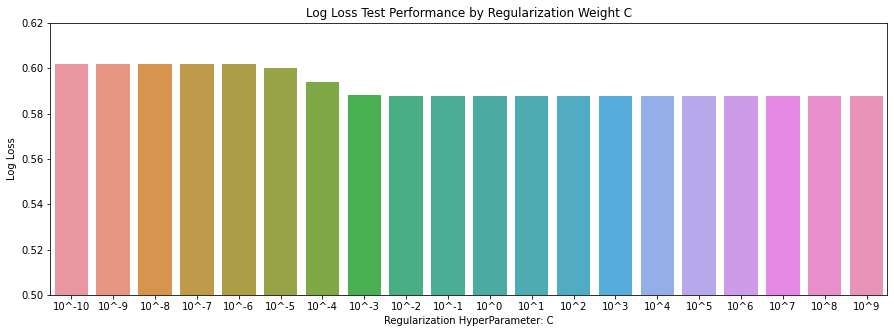

In [30]:
plt.figure(figsize=(15,5)) 

ax = sns.barplot(x=cs, y=ll_cs)
g = ax.set_xticklabels([f'10^{i}' for i in range(-10,10)])
ax.set_xlabel('Regularization HyperParameter: C')
ax.set_ylabel('Log Loss')
ax.set_ylim([0.5, 0.62])
g = plt.title('Log Loss Test Performance by Regularization Weight C')

<b>Analysis</b>: Which value of $C$ yields the best results, in terms of loss?

When C value is 0.001 do we get the best results in terms of loss.

#### Plot Accuracy

Execute the code below below to plot the resulting accuracy for every value of hyperparameter $C$.

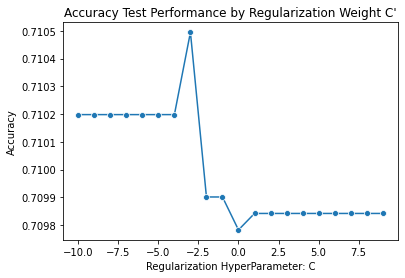

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.log10(cs)

sns.lineplot(x=x, y=acc_cs, marker='o')

plt.title("Accuracy Test Performance by Regularization Weight C'")
plt.xlabel("Regularization HyperParameter: C")
plt.ylabel("Accuracy")
plt.show()

<b>Analysis</b>: Which value of $C$ yields the best results, in terms of accuracy?

When C value is 0.001 do we get the best results in terms of accuracy.